<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-393 Máquinas de Aprendizaje II-2019 </h1>

<H3 align='center'> Tarea 3 - Ensamblados y modelos avanzados </H3>
<H3 align='center'> Sección 1 - Ensamblados para regresión </H3>
<hr style="height:2px;border:none"/>
<center>
    <h4> Sebastián Godínez San Martín, 201673520-8</h4>
    <h4> Daniel Toro, 201673595-K </h4> 
</center>

Las técnicas de ensamblados vistos en clases pueden ser aplicadas tanto a problemas de clasificación o regresión, teniendo la ventaja de utilizar múltiples modelos de aprendizaje para utilizar la ventaja de cada uno. En este actividad se trabajará con predecir la temperatura media de un día, dada cierta información del día anterior, como la humedad, velocidad del viento, presión atmosférica, fecha y temperatura. El modelo predictor derivado puede ser bastante útil para conocer el comportamiento del clima a lo largo del tiempo.

<img src="https://scijinks.gov/review/forecast-reliability/forecast-reliability2.jpg" title="Title text" width="70%"  />

Los datos de clima son recolectados en la ciudad Delhi de India por un período de 4 años (2013 a 2017), proporcionados en Kaggle a través del siguiente __[link](https://www.kaggle.com/sumanthvrao/daily-climate-time-series-data)__, las particiones de entrenamiento y prueba están dadas. El registro de cada dato corresponde a un día, incrementando a través de las filas por cada día.

---
    
>  Cargue los datos en un dataframe de pandas, además agregue una columna indicando el valor a predecir, la temperatura media del día siguiente. *Como el último dato/registro no tiene un valor a predecir éste se elimina*.

In [1]:
import pandas as pd
df = pd.read_csv("./daily-climate-time-series-data/DailyDelhiClimateTrain.csv")
df["y_value"] = df["meantemp"].shift(-1)
df = df.iloc[:-1] #remove last row
df

,date,meantemp,humidity,wind_speed,meanpressure,y_value
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,7.400000
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,7.166667
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,8.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,6.000000
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,7.000000
...,...,...,...,...,...,...
1456,2016-12-27,16.850000,67.550000,8.335000,1017.200000,17.217391
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217,15.238095
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762,14.095238
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762,15.052632


> Debido a la poca información que se tiene a través de los 4 parámetros medidos, extraíga más información a través de los datos de fecha. Por ejemplo, el comportamiento a través de los meses y años varía, así como la información de la temporada del año podría ayudar a la predicción. Decida si puede incluir más información a partir de la fecha que tenga sentido con el problema.

In [2]:
# procesamiento de fecha(datetime/timestamp) a numeros
df["date"] = pd.to_datetime(df["date"])
df['cday'] = df['date'].dt.dayofweek #0:lunes,6:domingo
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month #1:enero, 12: diciembre
# based on: https://en.wikipedia.org/wiki/Climate_of_India
seasons = ["winter","winter","summer","summer","summer","rainy","rainy","rainy","fall","fall","fall","winter"]
df['season'] = [ seasons[month_i - 1] for month_i in df['month'].values ]
df = pd.get_dummies(df,columns=['season']) #to one hot.. as nominal variable
# any more information?
df.drop(["date"], axis=1, inplace=True) #delete date

> Cree las matrices de entrenamiento, con los mil primeros registros, y de validación, con el resto. Para evitar el orden natural en que vienen los datos entrenados, realice un *shuffle* aleatorio.

In [3]:
y = df.pop("y_value").values
X = df.values
# conjunto entrenamiento
X_train = X[:1000]
Y_train = y[:1000]
# conjunto validacion
X_val = X[1000:]
Y_val = y[1000:]
from sklearn.utils import shuffle
X_train, Y_train = shuffle(X_train, Y_train, random_state=0) #shuffle values on train only

> a) Describa el problema trabajado, la cantida de datos que se cuenta como las características a trabajar. Al ser datos temporales podría ayudar una ilustración gráfica de la secuencias trabajadas y su comportamiento ¿Es válido el uso de la información sólo del día anterior?.

In [4]:
df

,meantemp,humidity,wind_speed,meanpressure,cday,year,month,season_fall,season_rainy,season_summer,season_winter
0,10.000000,84.500000,0.000000,1015.666667,1,2013,1,0,0,0,1
1,7.400000,92.000000,2.980000,1017.800000,2,2013,1,0,0,0,1
2,7.166667,87.000000,4.633333,1018.666667,3,2013,1,0,0,0,1
3,8.666667,71.333333,1.233333,1017.166667,4,2013,1,0,0,0,1
4,6.000000,86.833333,3.700000,1016.500000,5,2013,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1456,16.850000,67.550000,8.335000,1017.200000,1,2016,12,0,0,0,1
1457,17.217391,68.043478,3.547826,1015.565217,2,2016,12,0,0,0,1
1458,15.238095,87.857143,6.000000,1016.904762,3,2016,12,0,0,0,1
1459,14.095238,89.666667,6.266667,1017.904762,4,2016,12,0,0,0,1


In [5]:
import matplotlib.pyplot as plt

plt.plot(df.index, df["meantemp"])
plt.xlabel(" ")
plt.ylabel("Temperatura media")

Text(0, 0.5, 'Temperatura media')

(975, 1075.0)

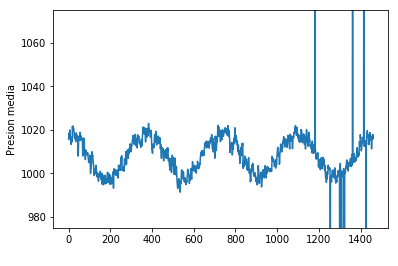

In [6]:
plt.plot(df.index, df["meanpressure"])
plt.xlabel(" ")
plt.ylabel("Presion media")
plt.ylim(top=1075)
plt.ylim(bottom=975)

Se ve que hay 1462 datos y se tiene información como la humedad, velocidad del viento, presión media, dia de la semana, año, mes y la estación.

No es correcto predecir la temperatura solo con el dia anterior, porque no hay correlación directa entre los comportamientos. Una dia puede que este soleado y la temperatura sea mayor y puede que el día siguiente este nublado y la temperatura baje drásticamente.

> b) Entrene un solo Árbol de Regresión de múltiples niveles para resolver el problema. Defina un Árbol **no regularizado** (como el que no tiene límites en su profundidad) y otro Árbol **regularizado** (variando los hiper-parámetros que prefiera, por ejemplo, los más comunes como la profundidad, el número mínimo de datos para realizar *split* o el número mínimo de datos en cada hoja). Además comente sobre la ventaja de usar un árbol de decisión respecto a la escala de los datos ¿Porqué no es necesario escalar los datos?

In [7]:
from sklearn.tree import DecisionTreeRegressor as Tree

def do_Tree(X, Y, max_depth=None, min_samples_split=1.0):
    model = Tree()
    model.set_params(max_depth=max_depth, min_samples_split=min_samples_split)
    model.fit(X, Y)
    return model

model_nr = do_Tree(X_train, Y_train)

model_r_10_05 = do_Tree(X_train, Y_train, 3,min_samples_split=2) 

La ventanja de utilizar árboles de desición es no tener que escalar los datos. Sin embargo, puede ser útil para la visualización de estos. No es necesario escalarlos dado que escalarlos solo los mueve en el espacio, entonces si bien el criterio para separarlos en dos grupos cambia númericamente, el resultado es el mismo.

> c) Para evaluar la calidad de predicción en este problema se utilizará la métrica *Root Mean Squared Error* (RMSE), indicando un error en la escala real de la temperatura. Como los datos de validación siguen con el orden temporal, visualice esa predicción a lo largo del tiempo. Comente sobre los resultados comparando la regularización *vs* el no regularizar.

RMSE train=  3.567413761517928
RMSE val=  3.922173970900396


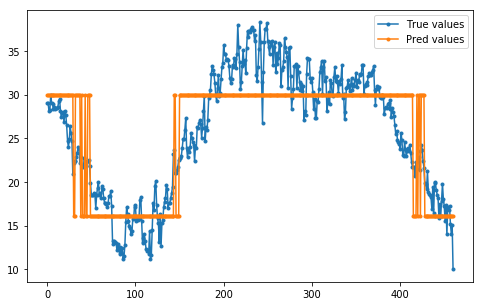

In [8]:
import numpy as np
import matplotlib.pyplot as plt
def RMSE(ytrue,ypred):
    return np.sqrt(np.mean(np.square(ytrue - ypred)) )

y_train_hat = model_nr.predict(X_train)
y_val_hat = model_nr.predict(X_val)
print("RMSE train= ",RMSE(Y_train,y_train_hat))
print("RMSE val= ",RMSE(Y_val,y_val_hat))

plt.figure(figsize=(8,5))
plt.plot(Y_val, '.-' ,label="True values")
plt.plot(y_val_hat, '.-' ,label="Pred values")
plt.legend()
plt.show()

RMSE train=  1.8860218948939755
RMSE val=  1.8547383542194982


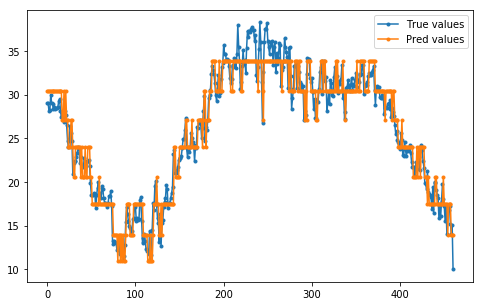

In [9]:
y_train_hat = model_r_10_05.predict(X_train)
y_val_hat = model_r_10_05.predict(X_val)
print("RMSE train= ",RMSE(Y_train,y_train_hat))
print("RMSE val= ",RMSE(Y_val,y_val_hat))

plt.figure(figsize=(8,5))
plt.plot(Y_val, '.-' ,label="True values")
plt.plot(y_val_hat, '.-' ,label="Pred values")
plt.legend()
plt.show()

Se ve una notoria diferencia en los resultados, en donde el regularizado tiene un rendimiento mucho mejor. Además el modelo regularizado visualmente es mucho más suave en comparación con el no regularizado.

> d) Entrene un ensamblado de árboles de múltiples niveles, mediante la técnica de **Bagging**, compare el Árbol **no regularizado** con el **regularizado** (*seteando los hiper-parámetros en base a lo experimentado anteriormente en b)*) ¿Qué debería suceder? ¿Se visualiza *overfitting*? Varíe la cantidad de árboles de decisión utilizados en el ensamblado (*n estimators*), realice un gráfico resumen del RMSE de entrenamiento y validación en función de este hiper-parámetro.

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/bagging.py:1009: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/bagging.py:1009: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/bagging.py:1009: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/bagging.py:1009: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do

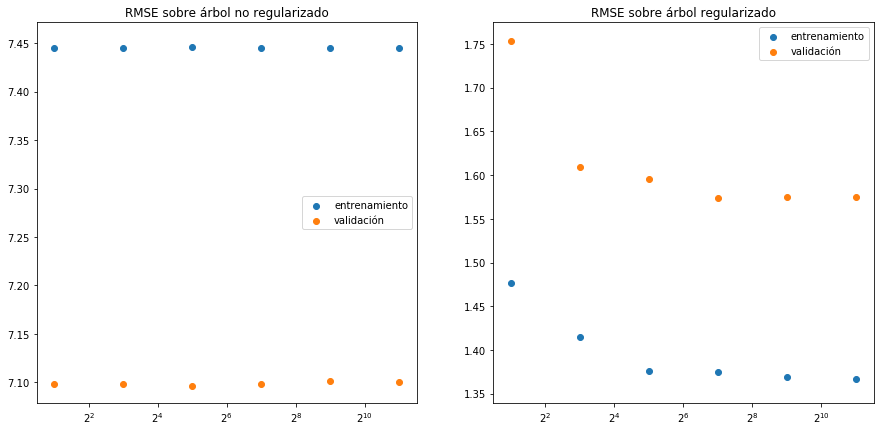

In [10]:
from sklearn.ensemble import BaggingRegressor

def do_Bagging(X, Y, max_depth=None, min_samples_split=1.0, n=10):
    tree = Tree()
    tree.set_params(max_depth=max_depth, min_samples_split=min_samples_split)
    model = BaggingRegressor(base_estimator=tree, n_estimators=n, n_jobs=-1, oob_score=True)
    model.fit(X, Y)
    return model

models_bnr = list()
models_br = list()

estimators = [2, 8, 32, 128, 2**9, 2**11]

for i in estimators:
    models_bnr.append(do_Bagging(X_train, Y_train, n=i))
    models_br.append(do_Bagging(X_train, Y_train, max_depth=10, min_samples_split=0.03, n=i))

values_br_train = list()
values_br_val = list()
for i in models_br:
    y_train_hat = i.predict(X_train)
    y_val_hat = i.predict(X_val)
    values_br_train.append(RMSE(Y_train,y_train_hat))
    values_br_val.append(RMSE(Y_val,y_val_hat))
    
values_bnr_train = list()
values_bnr_val = list()
for i in models_bnr:
    y_train_hat = i.predict(X_train)
    y_val_hat = i.predict(X_val)
    values_bnr_train.append(RMSE(Y_train,y_train_hat))
    values_bnr_val.append(RMSE(Y_val,y_val_hat))

fig1, ax1 = plt.subplots(1, 2, figsize=(15, 7))

ax1[0].scatter(estimators, values_bnr_train ,label="entrenamiento")
ax1[0].scatter(estimators, values_bnr_val ,label="validación")
ax1[0].set_title("RMSE sobre árbol no regularizado")
ax1[0].set_xscale('log', basex=2)
ax1[0].legend(loc="best")

ax1[1].scatter(estimators, values_br_train ,label="entrenamiento")
ax1[1].scatter(estimators, values_br_val ,label="validación")
ax1[1].set_title("RMSE sobre árbol regularizado")
ax1[1].set_xscale('log', basex=2)
ax1[1].legend(loc="best")

plt.show()

El uso de ensamblados deberia mejorar el rendimiento de ambos.No se vizualiza overfitting, porque al aumentar el número de estimadores el RMSE del set validación se mantiene constante.

> e) Entrene un ensamblado de árboles de múltiples niveles, mediante la técnica de **AdaBoost**, compare el Árbol **no regularizado** con el **regularizado** (*seteando los hiper-parámetros en base a lo experimentado anteriormente en d)* ¿Se visualiza *overfitting*? ¿Qué técnica utiliza la librería de sklearn, *re-muestrear* o *pesar* ejemplos? ¿Qué le parece más sensato?. Varíe la cantidad de árboles de decisión utilizados en el ensamblado (*n estimators*), realice un gráfico resumen del RMSE de entrenamiento y validación en función de este hiper-parámetro. Compare y analice con la técnica utilizada en d).

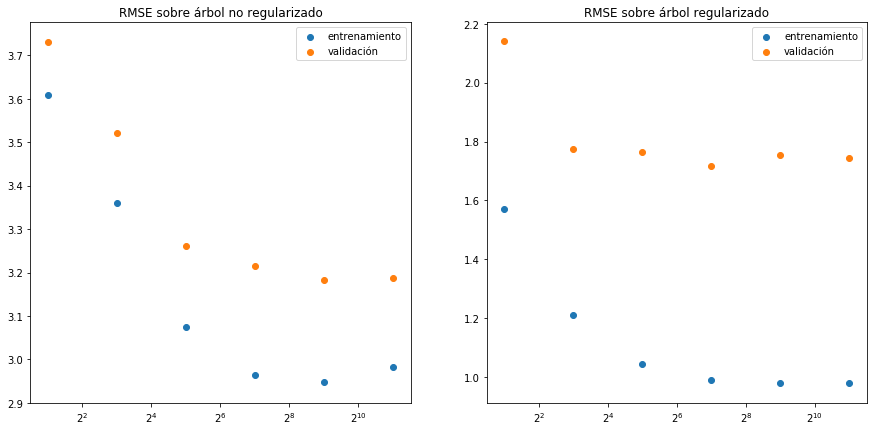

In [11]:
from sklearn.ensemble import AdaBoostRegressor
def do_AdaBoost(X, Y, max_depth=None, min_samples_split=1.0, n=10):
    tree = Tree()
    tree.set_params(max_depth=max_depth, min_samples_split=min_samples_split)
    model = AdaBoostRegressor(base_estimator=tree, n_estimators=n)
    model.fit(X, Y)
    return model

models_anr = list()
models_ar = list()

for i in estimators:
    models_anr.append(do_AdaBoost(X_train, Y_train, n=i))
    models_ar.append(do_AdaBoost(X_train, Y_train, max_depth=10, min_samples_split=0.03, n=i))

values_ar_train = list()
values_ar_val = list()
for i in models_ar:
    y_train_hat = i.predict(X_train)
    y_val_hat = i.predict(X_val)
    values_ar_train.append(RMSE(Y_train,y_train_hat))
    values_ar_val.append(RMSE(Y_val,y_val_hat))
    
values_anr_train = list()
values_anr_val = list()
for i in models_anr:
    y_train_hat = i.predict(X_train)
    y_val_hat = i.predict(X_val)
    values_anr_train.append(RMSE(Y_train,y_train_hat))
    values_anr_val.append(RMSE(Y_val,y_val_hat))

fig1, ax1 = plt.subplots(1, 2, figsize=(15, 7))

ax1[0].scatter(estimators, values_anr_train ,label="entrenamiento")
ax1[0].scatter(estimators, values_anr_val ,label="validación")
ax1[0].set_title("RMSE sobre árbol no regularizado")
ax1[0].set_xscale('log', basex=2)
ax1[0].legend(loc="best")

ax1[1].scatter(estimators, values_ar_train ,label="entrenamiento")
ax1[1].scatter(estimators, values_ar_val ,label="validación")
ax1[1].set_title("RMSE sobre árbol regularizado")
ax1[1].set_xscale('log', basex=2)
ax1[1].legend(loc="best")

plt.show()

 En caso del no regularizado se ve overfitting. Por otro lado el regularizado al igual que en caso anterior no se ve overfitting por los mismos motivos. Sk-learn utiliza pesar ejemplos. Dado que es difícil crear la noción de que sean modelos independientes, ambas parecen opciones sensatas. Por un lado, re muestreo genera una noción más marcada de "independecia" entre los modelos, pero no ocupa todo los datos para cada modelo. Por otro lado, el pesar ejemplos sí ocupa todos los datos, pero pierde un poco la noción de "independencia" entre los modelos.

> f) Pruebe otra técnica de ensamblado dedicada a árboles de decisión, que combina el muestreo *boostrap* de *Bagging* con muestreo sobre las *features*: **Random Forest**, compare el Árbol **no regularizado** con el **regularizado** ¿Se visualiza *overfitting*?. Varíe la cantidad de árboles de decisión utilizados en el ensamblado (*n estimators*), realice un gráfico resumen del RMSE de entrenamiento y validación en función de este hiper-parámetro.

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


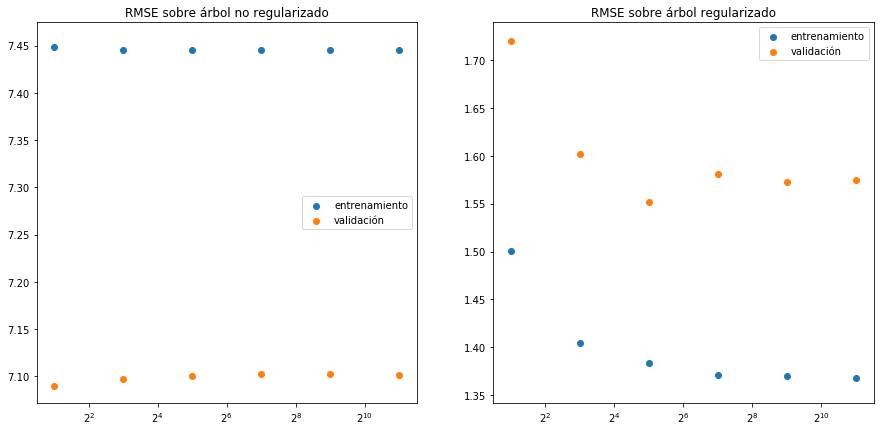

In [12]:
from sklearn.ensemble import RandomForestRegressor

def do_RandomForest(X, Y, max_depth=None, min_samples_split=1.0, n=10):
    model = RandomForestRegressor()
    model.set_params(n_estimators=n,
                     n_jobs=-1,
                     max_depth=max_depth,
                     min_samples_split=min_samples_split,
                     oob_score=True)
    model.fit(X, Y)
    return model

models_rfnr = list()
models_rfr = list()

for i in estimators:
    models_rfnr.append(do_RandomForest(X_train, Y_train, n=i))
    models_rfr.append(do_RandomForest(X_train, Y_train, max_depth=10, min_samples_split=0.03, n=i))

values_rfr_train = list()
values_rfr_val = list()
for i in models_rfr:
    y_train_hat = i.predict(X_train)
    y_val_hat = i.predict(X_val)
    values_rfr_train.append(RMSE(Y_train,y_train_hat))
    values_rfr_val.append(RMSE(Y_val,y_val_hat))
    
values_rfnr_train = list()
values_rfnr_val = list()
for i in models_rfnr:
    y_train_hat = i.predict(X_train)
    y_val_hat = i.predict(X_val)
    values_rfnr_train.append(RMSE(Y_train,y_train_hat))
    values_rfnr_val.append(RMSE(Y_val,y_val_hat))

fig1, ax1 = plt.subplots(1, 2, figsize=(15, 7))

ax1[0].scatter(estimators, values_rfnr_train ,label="entrenamiento")
ax1[0].scatter(estimators, values_rfnr_val ,label="validación")
ax1[0].set_title("RMSE sobre árbol no regularizado")
ax1[0].set_xscale('log', basex=2)
ax1[0].legend(loc="best")

ax1[1].scatter(estimators, values_rfr_train ,label="entrenamiento")
ax1[1].scatter(estimators, values_rfr_val ,label="validación")
ax1[1].set_title("RMSE sobre árbol regularizado")
ax1[1].set_xscale('log', basex=2)
ax1[1].legend(loc="best")

plt.show()

No se visualiza overfitting. Se ve que los resultados no varian substancialmente que con la otra técnica.

> g) Verifique que el **OOB error** (*out of bag error*) de los ensambladores que utilizan la técnica *boostrap* puede ser una alternativa como métrica de generalización, compare con el error calculado sobre el conjunto de validación (o en su defecto *cross validation*).

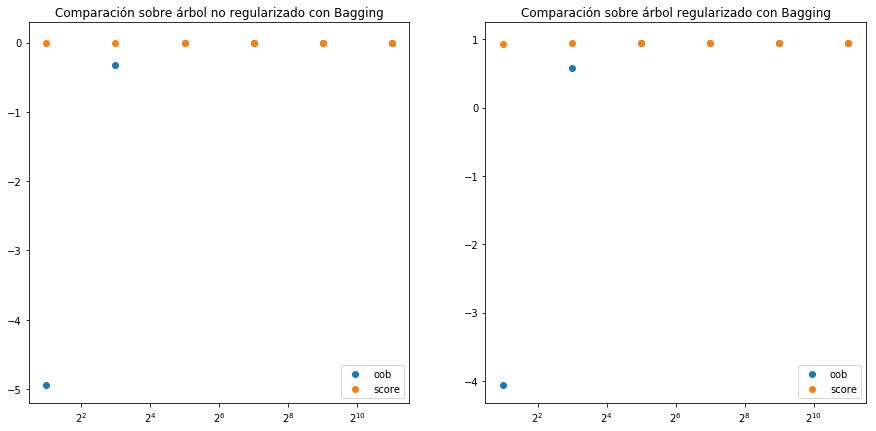

In [13]:
def comparacion(model, X_val, y_val):
    oob_error = model.oob_score_
    val_error = model.score(X_val,y_val)
    return oob_error, val_error
        
oob_bnr = list()
val_bnr = list()
for i in models_bnr:
    oob, val = comparacion(i, X_val, Y_val)
    oob_bnr.append(oob)
    val_bnr.append(val)
    
oob_br = list()
val_br = list()
for i in models_br:
    oob, val = comparacion(i, X_val, Y_val)
    oob_br.append(oob)
    val_br.append(val)
    
fig1, ax1 = plt.subplots(1, 2, figsize=(15, 7))

ax1[0].scatter(estimators, oob_bnr ,label="oob")
ax1[0].scatter(estimators, val_bnr ,label="score")
ax1[0].set_title("Comparación sobre árbol no regularizado con Bagging")
ax1[0].set_xscale('log', basex=2)
ax1[0].legend(loc="best")

ax1[1].scatter(estimators, oob_br ,label="oob")
ax1[1].scatter(estimators, val_br ,label="score")
ax1[1].set_title("Comparación sobre árbol regularizado con Bagging")
ax1[1].set_xscale('log', basex=2)
ax1[1].legend(loc="best")

plt.show()

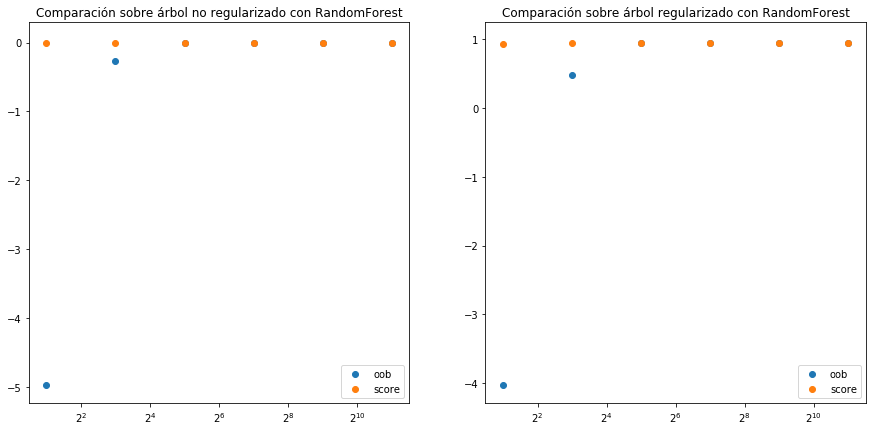

In [14]:
oob_rfnr = list()
val_rfnr = list()
for i in models_rfnr:
    oob, val = comparacion(i, X_val, Y_val)
    oob_rfnr.append(oob)
    val_rfnr.append(val)
    
oob_rfr = list()
val_rfr = list()
for i in models_rfr:
    oob, val = comparacion(i, X_val, Y_val)
    oob_rfr.append(oob)
    val_rfr.append(val)
    
fig1, ax1 = plt.subplots(1, 2, figsize=(15, 7))

ax1[0].scatter(estimators, oob_rfnr ,label="oob")
ax1[0].scatter(estimators, val_rfnr ,label="score")
ax1[0].set_title("Comparación sobre árbol no regularizado con RandomForest")
ax1[0].set_xscale('log', basex=2)
ax1[0].legend(loc="best")

ax1[1].scatter(estimators, oob_rfr ,label="oob")
ax1[1].scatter(estimators, val_rfr ,label="score")
ax1[1].set_title("Comparación sobre árbol regularizado con RandomForest")
ax1[1].set_xscale('log', basex=2)
ax1[1].legend(loc="best")

plt.show()

Se ve que ambos valores son muy similares y por lo tanto se puede utilizar como alternativa de la métrica de generalización.

> h) Defina otra forma de combinar los valores que entregan los ensamblados al hacer predicciones y compare con lo que se hace actualmente, por ejemplo *Bagging* realiza el voto de la mayoría para clasificación y promedio para regresión, *AdaBoost* realiza una combinación ponderada de cada clasificador dependiendo de su *habilidad* (desempeño para clasificar el conjunto de entrenamiento). Se puede inspirar desde clásicos estadísticos, como entregar el primer cuartíl ($Q_1$) si al ensamblado le cuesta predecir valores bajos, o el segundo cuartil ($Q_2$) o mediana para ser robusto a predicciones atípicas de modelos.  

In [15]:
def combine_predictions(predictions):
    predictions = np.array(predictions)

    return np.median(predictions, axis=0)

tree = Tree()
tree.set_params(max_depth=10, min_samples_split=0.03)
model = BaggingRegressor(base_estimator=tree, n_estimators=2**5, n_jobs=-1, oob_score=True)
model.fit(X_train, Y_train)
y_val_predict = model.predict(X_val)
print("RMSE predefinido val= ",RMSE(Y_val, y_val_predict))
list_estimators = model.estimators_
list_predictions = [estimator.predict(X_val) for estimator in list_estimators]
new_predictions = combine_predictions(list_predictions)
print("RMSE val= ",RMSE(Y_val, new_predictions))

RMSE predefinido val=  1.5625226643505081
RMSE val=  1.5618366515996398


En este caso se decidio utilizar la mediana de las predicciones. 

> i) Si se cuenta con una gran cantidad de modelos en el ensamblado, por ejemplo $T>100$, se puede crear un intervalo de confianza de la predicción a través de todos estos valores, asumiendo una distribución Normal centrada en la media muestral de las predicciones, con desviación estándar muestral en las predicciones. El intervalo de confianza entrega más información que un único valor puntual de predicción. Visualice un intervalo de confianza al 95% de probabilidad en la predicción a lo largo de la serie de tiempo de validación, comente. Al asumir una distribución Normal, también puede explorar el tomar como predicción del ensamblado el muestreo sobre la distribución Normal creada entorno a los datos muestrales.

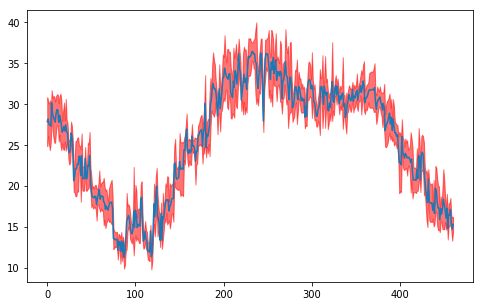

In [16]:
X_val_est = np.vstack(list_predictions).T #has shape=(N_test, n_estimator), with n_estimator>100
from scipy.stats import norm
interv_val = []
for n in range(X_val.shape[0]):
    low, up = norm.interval(0.95, loc=np.mean(X_val_est[n]), scale=np.std(X_val_est[n]))
    interv_val.append([low,up])
interv_val = np.asarray(interv_val)
x = np.arange(X_val_est.shape[0])
plt.figure(figsize=(8,5))
plt.plot(x, np.mean(X_val_est, axis=1))
plt.fill_between(x, interv_val[:,0], interv_val[:,1], color='r', alpha=.55)
plt.show()

Se ve que las prediciones del modelo caen dentro del intervalo de confianza, por lo que se reafirma la validez del modelo.

>  j) Evalúe y visualice la predicción del mejor modelo encontrado para resolver este problema, en el conjunto de pruebas. Además, compare y analice las distintas maneras con las que se resolvió el problema, incluya las decisiones que conlleva y los resultados que reflejan.

En terminos de rendimiento en base a la experimentacion realizada, en primer lugar se ve que el modelo regularaziado por si solo tiene un ajuste mucho más cercano y suave que el no regularizado. Luego al utilizar Bagging para el modelo regularizado  se me una disminución en el RMSE. Por otro lado, el modelo no regularizado subrio un empeoramiento del desempeño al aumentar su RMSE. En el caso de AdaBoost tiene un peor desempeño que Bagging. Finalmente random forest tiene un desempeño similar a Baggings. En vista de lo anterior, para este problema en particular el mejor modelo que se obtuvo fue Baggings y Random Forest. Arbitrariamente se utilizó Bagging sobre el conjunto de test.

In [17]:
df = pd.read_csv("./daily-climate-time-series-data/DailyDelhiClimateTest.csv")
df["y_value"] = df["meantemp"].shift(-1)
df = df.iloc[:-1] #remove last row
df

,date,meantemp,humidity,wind_speed,meanpressure,y_value
0,2017-01-01,15.913043,85.869565,2.743478,59.000000,18.500000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778,17.111111
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333,18.700000
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000,18.388889
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333,19.318182
...,...,...,...,...,...,...
108,2017-04-19,33.500000,24.125000,9.025000,1000.875000,34.500000
109,2017-04-20,34.500000,27.500000,5.562500,998.625000,34.250000
110,2017-04-21,34.250000,39.375000,6.962500,999.875000,32.900000
111,2017-04-22,32.900000,40.900000,8.890000,1001.600000,32.875000


In [18]:
# procesamiento de fecha(datetime/timestamp) a numeros
df["date"] = pd.to_datetime(df["date"])
df['cday'] = df['date'].dt.dayofweek #0:lunes,6:domingo
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month #1:enero, 12: diciembre
# based on: https://en.wikipedia.org/wiki/Climate_of_India
seasons = ["winter","winter","summer","summer","summer","rainy","rainy","rainy","fall","fall","fall","winter"]
df['season'] = [ seasons[month_i - 1] for month_i in df['month'].values ]
df["season_fall"] = 0
df["season_rainy"] = 0
df = pd.get_dummies(df,columns=['season']) #to one hot.. as nominal variable
# any more information?
df.drop(["date"], axis=1, inplace=True) #delete date

df

,meantemp,humidity,wind_speed,meanpressure,y_value,cday,year,month,season_fall,season_rainy,season_summer,season_winter
0,15.913043,85.869565,2.743478,59.000000,18.500000,6,2017,1,0,0,0,1
1,18.500000,77.222222,2.894444,1018.277778,17.111111,0,2017,1,0,0,0,1
2,17.111111,81.888889,4.016667,1018.333333,18.700000,1,2017,1,0,0,0,1
3,18.700000,70.050000,4.545000,1015.700000,18.388889,2,2017,1,0,0,0,1
4,18.388889,74.944444,3.300000,1014.333333,19.318182,3,2017,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
108,33.500000,24.125000,9.025000,1000.875000,34.500000,2,2017,4,0,0,1,0
109,34.500000,27.500000,5.562500,998.625000,34.250000,3,2017,4,0,0,1,0
110,34.250000,39.375000,6.962500,999.875000,32.900000,4,2017,4,0,0,1,0
111,32.900000,40.900000,8.890000,1001.600000,32.875000,5,2017,4,0,0,1,0


In [19]:
Y_test = df.pop("y_value").values
X_test = df.values

X_test, Y_test = shuffle(X_test, Y_test, random_state=0) #shuffle values on train only
df

,meantemp,humidity,wind_speed,meanpressure,cday,year,month,season_fall,season_rainy,season_summer,season_winter
0,15.913043,85.869565,2.743478,59.000000,6,2017,1,0,0,0,1
1,18.500000,77.222222,2.894444,1018.277778,0,2017,1,0,0,0,1
2,17.111111,81.888889,4.016667,1018.333333,1,2017,1,0,0,0,1
3,18.700000,70.050000,4.545000,1015.700000,2,2017,1,0,0,0,1
4,18.388889,74.944444,3.300000,1014.333333,3,2017,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
108,33.500000,24.125000,9.025000,1000.875000,2,2017,4,0,0,1,0
109,34.500000,27.500000,5.562500,998.625000,3,2017,4,0,0,1,0
110,34.250000,39.375000,6.962500,999.875000,4,2017,4,0,0,1,0
111,32.900000,40.900000,8.890000,1001.600000,5,2017,4,0,0,1,0


In [20]:
model = do_Bagging(X_train, Y_train, max_depth=10, min_samples_split=0.03, n=2**9)

value = model.predict(X_test)
RMSE(Y_test, value)

1.6882453502665824

Del conjunto de test se ve que se obtiene un RMSE bastante similiar al de test, por lo que es un resultado aceptable.

El uso de modelos no regularizados puede sonar como una alternativa atractiva, dado que no se requiere hacer seteo de parámetros, pero los resultados son considerablemente peores que los regularizados. Por otro lado, los modelos regularizados tienen un mejor desempeño, pero dependiendo del problema, los valores de los parámetros podrian influir de una manera muy brusca en los resultados.

Los modelos de ensamblados no presentaron una gran mejora con respecto al árbol de regresión, sin embargo el tener un grupo de validación implícito, como en el caso de Baggin puede justificar su uso, dado que es menos costoso validar el modelo en comparación con realizar un k fold cross validation.

<a id="refs"></a>
## Referencias
[1] https://scikit-learn.org/stable/modules/ensemble.html  
[2] https://scikit-learn.org/stable/modules/tree.html  
[3] http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html  
[4] https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18